In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report)
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Datos/Transformados/df_limpio.csv", index_col='ID')

In [76]:
df.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,Posesion_Hipoteca,Personas_Cargo,Fiador,Impago,Prima,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Divorciado,Estado_Civil_Soltero
ID,,,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.06,48,0.10,0,1,0,0,0,15.0,False,False,False,False,True
RLGTBY,50,62116,37278,486,217,3,21.96,12,0.55,1,1,0,1,1,15.0,False,False,True,False,False
SKE2P9,37,37602,44532,765,150,3,11.20,60,0.23,1,1,1,1,0,15.0,False,False,True,False,False
E2FB1D,56,67410,23752,643,369,1,21.24,24,0.18,1,0,1,0,0,15.0,False,False,False,False,False
TKSCGH,35,35930,28440,645,136,3,16.95,12,0.55,1,1,1,1,0,15.0,False,True,False,False,True


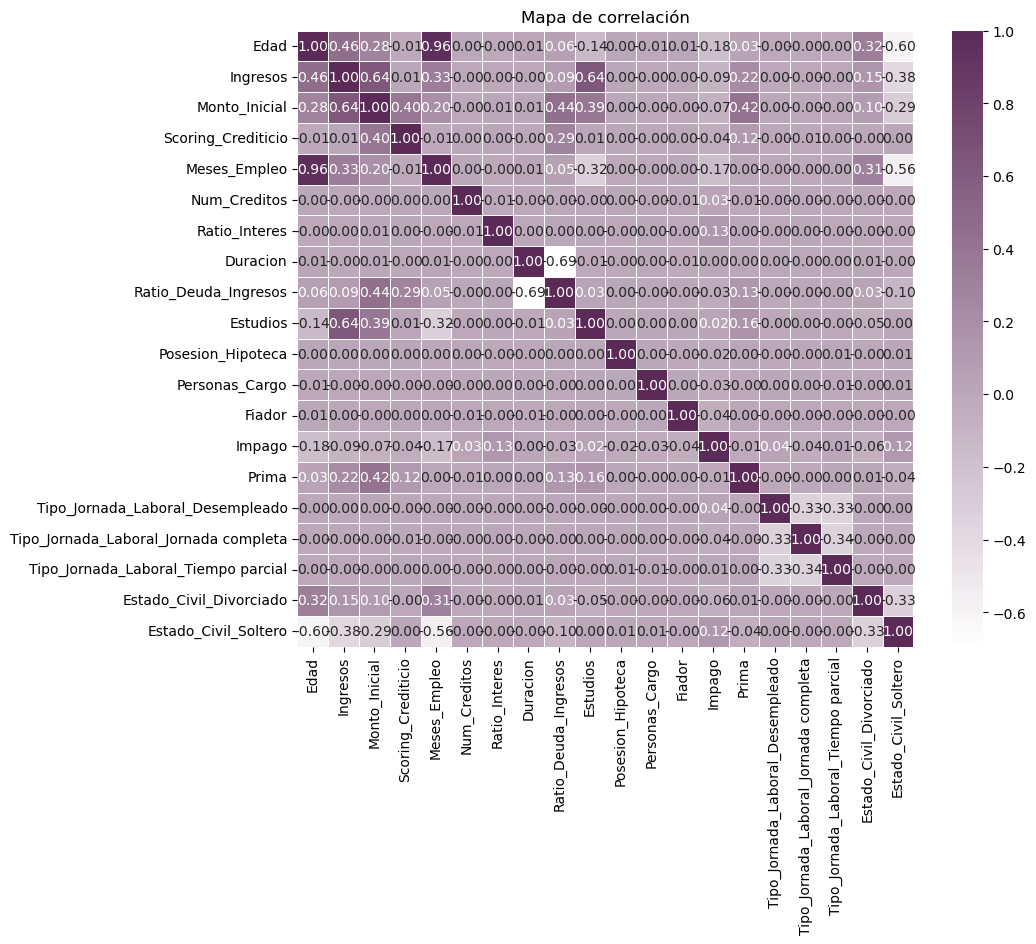

In [77]:
corr = df.corr(numeric_only=True)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=lagun_cmap,
    square=True,
    linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()

In [78]:
df.columns

Index(['Edad', 'Ingresos', 'Monto_Inicial', 'Scoring_Crediticio',
       'Meses_Empleo', 'Num_Creditos', 'Ratio_Interes', 'Duracion',
       'Ratio_Deuda_Ingresos', 'Estudios', 'Posesion_Hipoteca',
       'Personas_Cargo', 'Fiador', 'Impago', 'Prima',
       'Tipo_Jornada_Laboral_Desempleado',
       'Tipo_Jornada_Laboral_Jornada completa',
       'Tipo_Jornada_Laboral_Tiempo parcial', 'Estado_Civil_Divorciado',
       'Estado_Civil_Soltero'],
      dtype='object')

In [79]:
x = df.drop(columns=['Impago','Prima'])
y = df['Impago']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.30,
    random_state=8,
    shuffle=True,
    stratify=y)

In [80]:
# # PCA
# num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# scaler = MinMaxScaler()
# x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
# x_test[num_cols] = scaler.transform(x_test[num_cols])

# pca = PCA()
# X_train_pca = pca.fit_transform(x_train)

# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# for i, v in enumerate(explained_variance):
#     print(f"Componentes {i+1}: {v:.4f}")

# pca = PCA(n_components=0.90)
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

# print("Número de componentes finales:", pca.n_components_)

# x_train = pd.DataFrame(
#     X_train_pca,
#     columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
#     index=x_train.index)

# x_test = pd.DataFrame(
#     X_test_pca,
#     columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])],
#     index=x_test.index)

## Ejemplo de Regresion Logistica sin SMOTE

Mejores parámetros: {'selector__k': 40, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     13442
           1       0.20      0.66      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.85      0.64      0.70     15254



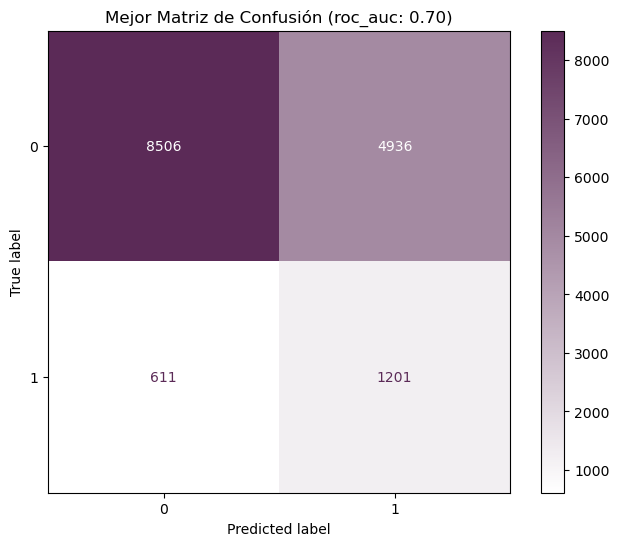

In [89]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog = {
    "modelo": "Regresion Logistica",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## LDA

Mejores parámetros: {'selector__k': 60, 'lda__solver': 'lsqr', 'lda__shrinkage': 0.1}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.65     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.84      0.65      0.71     15254



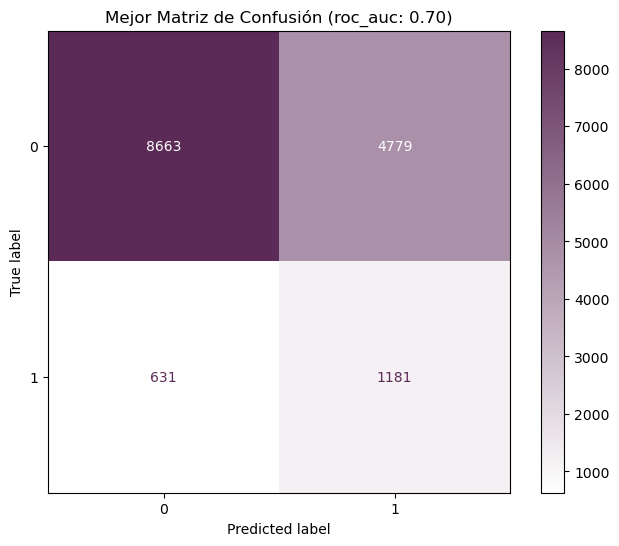

In [81]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_LDA = {
    "modelo": "LDA",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Regresion Logistica

Mejores parámetros: {'selector__k': 40, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.84      0.64      0.71     15254



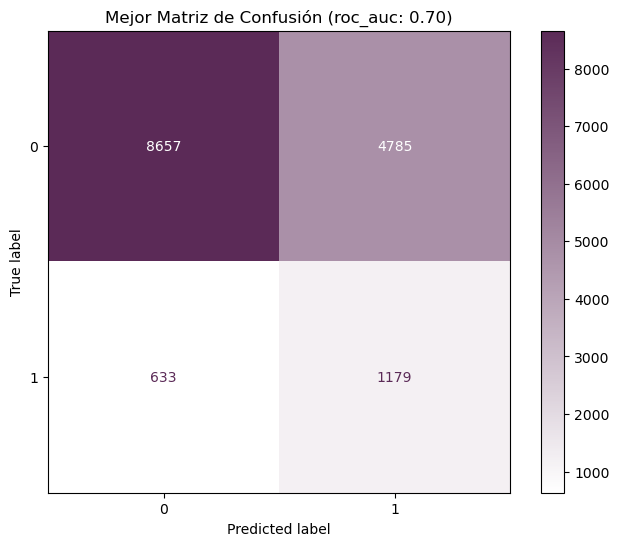

In [82]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('smote', SMOTE(random_state=6)),
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog = {
    "modelo": "Regresion Logistica",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     13442
           1       0.19      0.63      0.29      1812

    accuracy                           0.63     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.63      0.69     15254



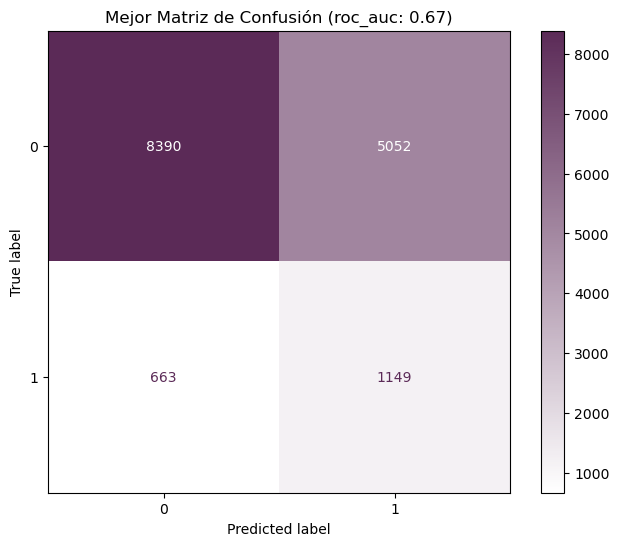

In [83]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay = {
    "modelo": "Naive Bayes",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## SVM

Mejores parámetros: {'svm__C': 0.01, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.64      0.71     15254



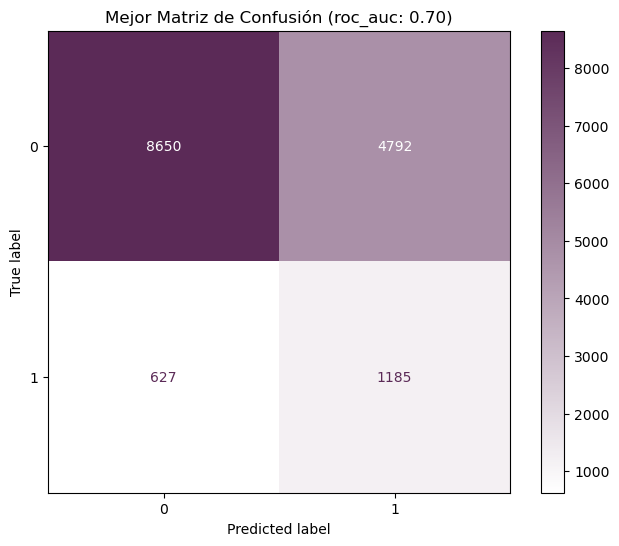

In [84]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM = {
    "modelo": "SVM",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

## Arbol de decision

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     13442
           1       0.19      0.56      0.28      1812

    accuracy                           0.67     15254
   macro avg       0.56      0.62      0.53     15254
weighted avg       0.83      0.67      0.72     15254



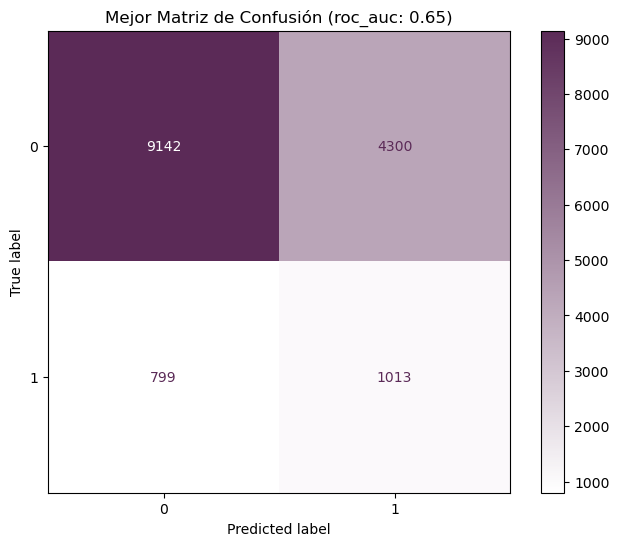

In [85]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol = {
    "modelo": "Arbol de decision",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

Number of mislabeled points out of a total 15254 points : 2312

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     13442
           1       0.30      0.21      0.25      1812

    accuracy                           0.85     15254
   macro avg       0.60      0.57      0.58     15254
weighted avg       0.83      0.85      0.84     15254


Confusion matrix:
 [[12560   882]
 [ 1430   382]]


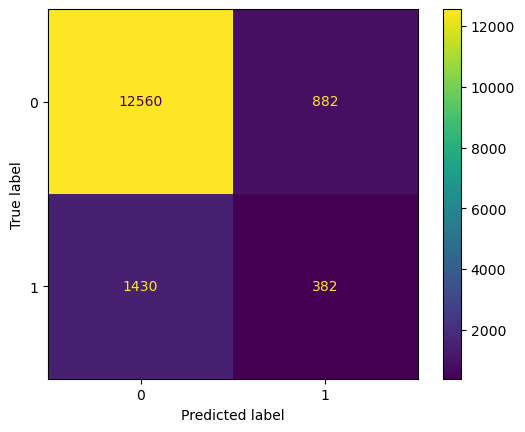

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (len(y_test), (y_test != y_pred).sum()))

report_dict = classification_report(y_test, y_pred, output_dict=True, digits=4)
precision_cancel = report_dict['1']['precision']
recall_cancel = report_dict['1']['recall']
f1_cancel = report_dict['1']['f1-score']

fila_modelo = pd.DataFrame({
    'Modelo': ['NaiveBayes'],
    'Precision': [precision_cancel],
    'Recall': [recall_cancel],
    'F1': [f1_cancel]})


print("\nClassification report for classifier GaussianNB():")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

## Resultados

In [87]:
df = pd.DataFrame(columns=[
    "modelo",
    "roc-auc",
    "recall 1",
    "f1-score medio"])

df = pd.concat([df, pd.DataFrame([fila_LDA])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_RegLog])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_Arbol])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_NaiBay])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([fila_SVM])], ignore_index=True)

In [88]:
df_ordenado = df.sort_values(by="roc-auc", ascending=False).round(3).reset_index(drop=True)

print(df_ordenado.to_string(index=False))

             modelo  roc-auc  recall 1  f1-score medio
Regresion Logistica    0.704     0.651           0.532
                LDA    0.704     0.652           0.533
                SVM    0.703     0.654           0.533
        Naive Bayes    0.674     0.634           0.516
  Arbol de decision    0.648     0.559           0.533
